In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stockerbot-export1.csv')

df.head()

,id,text,timestamp,source,symbols,company_names,url,verified
0,1.0197E+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,TRUE
1,1.01971E+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,TRUE
2,1.01971E+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,TRUE
3,1.01972E+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,TRUE
4,1.01972E+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,TRUE


In [ ]:
df = df.drop(['timestamp','url'], axis=1)

In [ ]:
df.isnull().sum()

id               0
text             0
source           3
symbols          3
company_names    5
verified         4
dtype: int64

In [ ]:
df=df.dropna()
df.isnull().sum()

id               0
text             0
source           0
symbols          0
company_names    0
verified         0
dtype: int64

Text(0.5, 1.0, 'Source with most number of tweets')

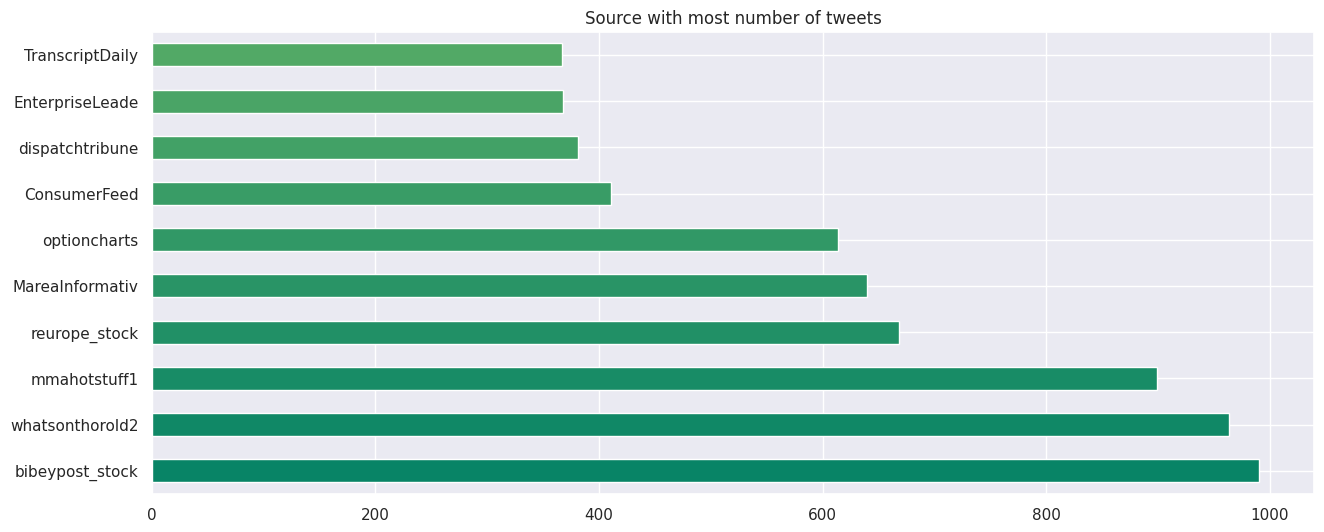

In [ ]:
plt.figure(figsize=(15,6))
df['source'].value_counts()[:10].plot(kind='barh',color=sns.color_palette('summer',30))
plt.title('Source with most number of tweets')

<Axes: >

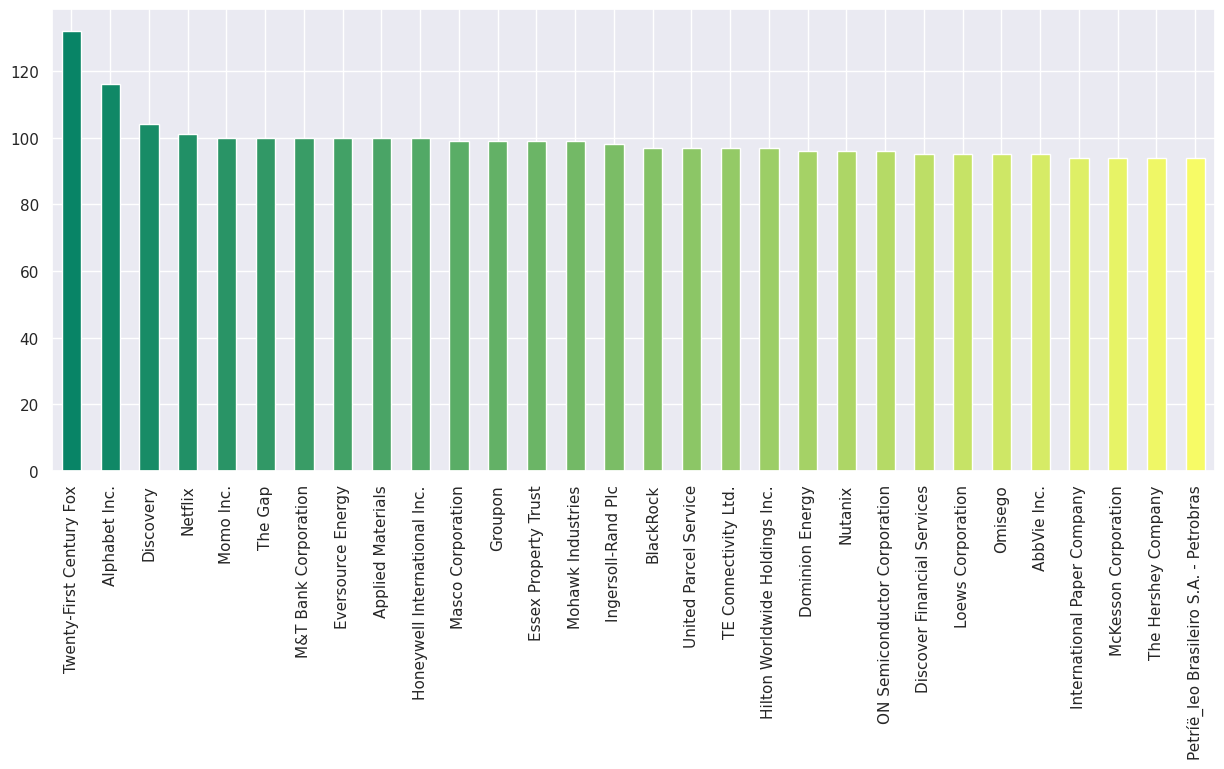

In [ ]:
plt.figure(figsize=(15,6))
df['company_names'].value_counts()[:30].plot(kind='bar',color=sns.color_palette('summer',30))

In [ ]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
pat3 = r'[^a-zA-Z]'
combined_pat2 = r'|'.join((combined_pat,pat3))

In [ ]:
len(df['text'])

28435

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
cleaned_tweets = []

for i in range(0, len(df['text'])) :
    tweets = re.sub(combined_pat2,' ',df['text'][i])
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [ps.stem(word) for word in tweets if not word in set(stopwords.words('english'))]
    tweets = ' '.join(tweets)
    cleaned_tweets.append(tweets)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
cleaned_tweets[:10]

['video offic mind busi david solomon tell gs intern learn wa',
 'price lumber lb f sinc hit ytd high maci turnaround still happen',
 'say american dream dead',
 'barri silbert extrem optimist bitcoin predict new crypto entrant go zero',
 'satellit avoid attack space junk circl earth paid',
 'david butler favorit fang stock realmoneysod alphabet facebook',
 'miss convo one favorit thinker',
 'u intellig document nelson mandela made public',
 'senat want emerg alert go netflix spotifi etc',
 'hedg fund manag marc larsi say bitcoin k possibl']

In [ ]:
df['cleaned_tweets'] = cleaned_tweets

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
for tweet in cleaned_tweets[:10]:
    print(tweet)
    s = sia.polarity_scores(tweet)
    for k in sorted(s):
        print('{0}: {1}, '.format(k, s[k]), end='')
        print()

video offic mind busi david solomon tell gs intern learn wa
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
price lumber lb f sinc hit ytd high maci turnaround still happen
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
say american dream dead
compound: -0.5106, 
neg: 0.518, 
neu: 0.241, 
pos: 0.241, 
barri silbert extrem optimist bitcoin predict new crypto entrant go zero
compound: 0.5267, 
neg: 0.0, 
neu: 0.746, 
pos: 0.254, 
satellit avoid attack space junk circl earth paid
compound: -0.6486, 
neg: 0.469, 
neu: 0.531, 
pos: 0.0, 
david butler favorit fang stock realmoneysod alphabet facebook
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
miss convo one favorit thinker
compound: -0.1531, 
neg: 0.286, 
neu: 0.714, 
pos: 0.0, 
u intellig document nelson mandela made public
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
senat want emerg alert go netflix spotifi etc
compound: 0.3612, 
neg: 0.0, 
neu: 0.632, 
pos: 0.368, 
hedg fund manag marc larsi say bitcoin k possibl
compound: 0

In [ ]:
def findpolarity(data):
    sid = SentimentIntensityAnalyzer()
    polarity = sid.polarity_scores(data)
    if(polarity['compound'] >= 0.2):
        sentiment = 1
    if(polarity['compound'] <= -0.2):
        sentiment = -1
    if(polarity['compound'] < 0.2 and polarity['compound'] >-0.2):
        sentiment = 0
    return(sentiment)

In [ ]:
findpolarity(cleaned_tweets[0])

0

In [ ]:
sentiment = []
for i in range(0, len(cleaned_tweets)):
    s = findpolarity(cleaned_tweets[i])
    sentiment.append(s)

In [ ]:
tweet_sentiment = pd.DataFrame()
tweet_sentiment['cleaned_tweets'] = cleaned_tweets
tweet_sentiment['sentiment'] = sentiment

In [ ]:
tweet_sentiment.to_csv('tweet_sentiment.csv', index=False)

In [ ]:
df1=pd.read_csv('/content/tweet_sentiment.csv')

In [ ]:
df1.head()

,cleaned_tweets,sentiment
0,video offic mind busi david solomon tell gs in...,0
1,price lumber lb f sinc hit ytd high maci turna...,0
2,say american dream dead,-1
3,barri silbert extrem optimist bitcoin predict ...,1
4,satellit avoid attack space junk circl earth paid,-1


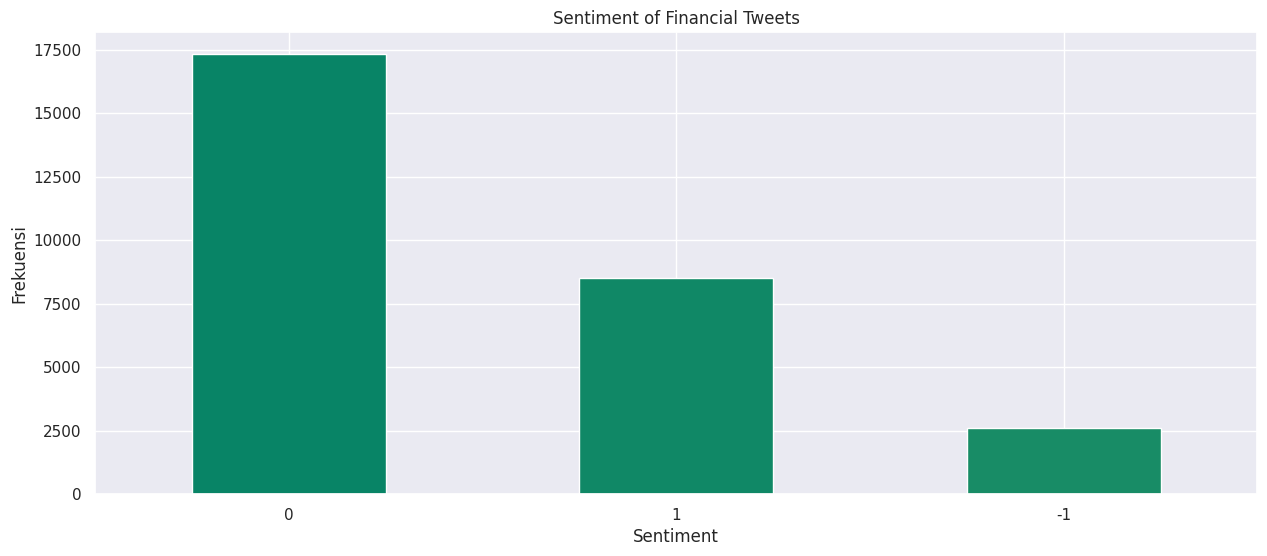

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
df1['sentiment'].value_counts()[:30].plot(kind='bar',color=sns.color_palette('summer',30))

plt.title('Sentiment of Financial Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Frekuensi')

plt.gca().tick_params(axis='x', rotation=0)

In [ ]:
positive_tweet = []
negative_tweet = []
neutral_tweet = []

for i in range(0, tweet_sentiment.shape[0]):
    if tweet_sentiment['sentiment'][i] == 1:
        neutral_tweet.append(tweet_sentiment['cleaned_tweets'][i])
    elif tweet_sentiment['sentiment'][i] == 2:
        positive_tweet.append(tweet_sentiment['cleaned_tweets'][i])
    elif tweet_sentiment['sentiment'][i] == 0:
        negative_tweet.append(tweet_sentiment['cleaned_tweets'][i])

In [ ]:
negative_tweet[:10]

['video offic mind busi david solomon tell gs intern learn wa',
 'price lumber lb f sinc hit ytd high maci turnaround still happen',
 'david butler favorit fang stock realmoneysod alphabet facebook',
 'miss convo one favorit thinker',
 'u intellig document nelson mandela made public',
 'hedg fund manag marc larsi say bitcoin k possibl',
 'roger feder uniqlo deal make one athlet earn endors',
 'bond trader ahead jerom powel come inflat expect via',
 'alcoa cut adjust ebitda forecast cite tariff share slide',
 'gap tighten race trillion dollar valuat amazon hit billion via']

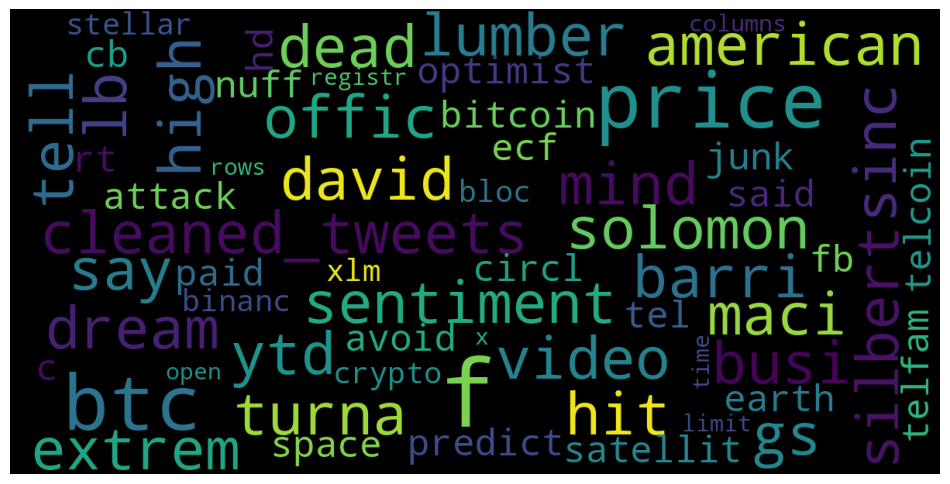

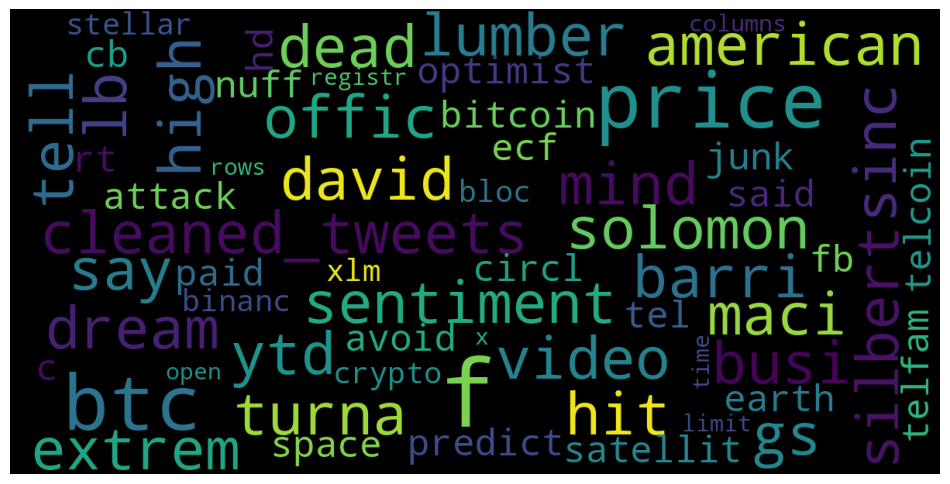

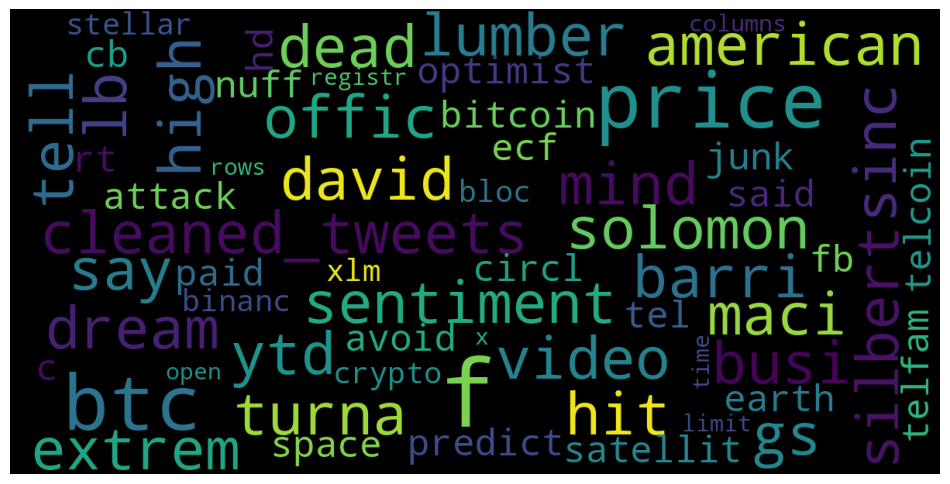

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(df1))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(positive_tweet)
show_wordcloud(neutral_tweet)
show_wordcloud(negative_tweet)

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.4 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from datasets import DatasetDict, Dataset
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
from sklearn.utils.class_weight import compute_class_weight
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from tensorboard.backend.event_processing import event_accumulator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
df1.head()

,cleaned_tweets,sentiment
0,video offic mind busi david solomon tell gs in...,0
1,price lumber lb f sinc hit ytd high maci turna...,0
2,say american dream dead,-1
3,barri silbert extrem optimist bitcoin predict ...,1
4,satellit avoid attack space junk circl earth paid,-1


In [ ]:
df1 = df1.rename(columns={'cleaned_tweets': 'tweet'})

In [ ]:
unique=df1['sentiment'].unique()
print(unique)

[ 0 -1  1]


In [ ]:
df1.head()

,statement,sentiment
0,video offic mind busi david solomon tell gs in...,0
1,price lumber lb f sinc hit ytd high maci turna...,0
2,say american dream dead,-1
3,barri silbert extrem optimist bitcoin predict ...,1
4,satellit avoid attack space junk circl earth paid,-1
